# Las dimensiones óptimas de una lata

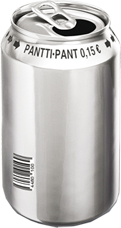

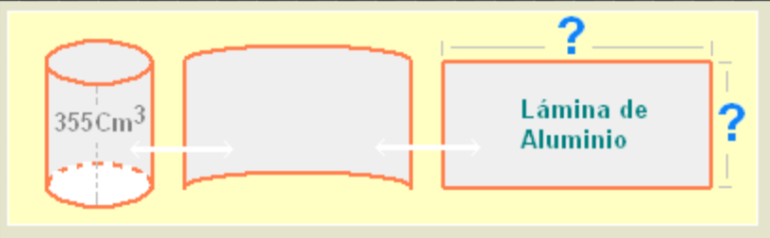

Encontrar las dimensiones óptimas de una lata de refresco es un problema simple de optimización no lineal. Consideramos una lata de refresco idealizada que se representa como un cilindro con radio r y altura h. El problema es encontrar el radio y la altura que minimice el área de superficie del cilindro mientras se mantiene un volumen fijo. Aquí, el área de superficie del cilindro se aproxima a la cantidad de aluminio necesaria para una lata de refresco, por lo que este problema se puede utilizar para predecir la cantidad mínima de aluminio necesaria para contener un volumen determinado

El area del cilindro es:

$$2 \pi r (r+h)$$

Un refresco estandar es de $12 oz$ o $355 ml$. Entonces, el volumen es:

$$ \pi r^2 h = 355$$

La siguiente representacion de optimizacion para este problema es:

$$
\begin{equation*}
 \begin{array}{ll}
     \min & 2 \pi r (r+h)\\
     \textrm{s.t. } & \pi r^2 h = 355\\
     & r \geq 0\\
     & h \geq 0
 \end{array}
 \end{equation*}
$$

Este es un problema nonlineal.

In [5]:
from pyomo.environ import *
from math import pi

m = ConcreteModel()

m.r = Var(bounds=(0,None))
m.h = Var(bounds=(0,None))

m.o = Objective(expr=2*pi*m.r*(m.r + m.h))
m.c = Constraint(expr=pi*m.h*m.r**2 == 355)

solver = SolverFactory('ipopt')
status = solver.solve(m)

print("Status = %s" % status.solver.termination_condition)

print("%s = %f" % (m.r, value(m.r)))
print("%s = %f" % (m.h, value(m.h)))
print("Objective = %f" % value(m.o))

Status = optimal
r = 3.837215
h = 7.674430
Objective = 277.545024


# Referencias

- https://www.youtube.com/watch?v=V7HrkWdnarI
- http://pyomocontrib-simplemodel.readthedocs.io/en/latest/sodacan.html
- https://es.wikipedia.org/wiki/Lata